# **Trabajo Practico 1 - NLP**

## **Ejercicio 1:**

Construir un dataset haciendo web scraping de p√°ginas web de su elecci√≥n.

‚óè Definir 4 categor√≠as de noticias/art√≠culos.

‚óè Para cada categor√≠a, extraer los siguientes datos de 10 noticias diferentes:

‚óã url (sitio web donde se public√≥ el art√≠culo)

‚óã t√≠tulo (t√≠tulo del art√≠culo)

‚óã texto (contenido del art√≠culo)

Recomendaciones: elegir blogs para evitar los l√≠mites de lectura para los medios que exigen suscripci√≥n. Investigue sobre el archivo robots.txt y t√©ngalo en cuenta. Considere tambi√©n espaciar las consultas para evitar saturar el sitio. Utilizando los datos obtenidos construya el dataset en formato csv.

**Categorias (rese√±as de):**

- Videojuegos
- Peliculas
- Musica
- Hoteles

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings

In [2]:
# response = requests.get('https://rockentreamigos.com/2019/10/25/grupo-theatre-of-tragedy-discolast-curtain-call-ano2011/') #LO PAS√â A TRUE PARA QUE VERIFIQUE CREDENCIALES Y NO MUESTRE LA ADVERTENCIA EN EL OTRO BLOQUE

# soup = BeautifulSoup(response.text, 'html.parser')

# titulo = soup.find('h1')

# texto = soup.find('div', {'class': 'entry-content'})

# texto = texto.find_all(['p', 'h2'])

# parrafo = '\n'.join(par.text for par in texto)

In [3]:
videojuegos = {
                0: "https://lavidaesunvideojuego.com/2023/10/18/resena-resident-evil-4-separate-ways-mucho-mas-que-un-simple-dlc/",
                1: 'https://lavidaesunvideojuego.com/2023/10/20/resena-crymachina-en-verdad-es-necesario-salvar-la-humanidad/',
                2: 'https://lavidaesunvideojuego.com/2023/10/09/resena-forza-motorsport-simulacion-en-su-maxima-expresion/',
                3: 'https://lavidaesunvideojuego.com/2023/10/10/assassins-creed-mirage-un-desierto-o-un-oasis/',
                4: 'https://lavidaesunvideojuego.com/2023/10/13/bilkins-folly-resena-un-desafio-digno-de-un-caza-tesoros/',
                5: 'https://lavidaesunvideojuego.com/2023/10/05/resena-truck-driver-the-american-dream-se-el-conductor-de-tu-propia-vida/',
                6: 'https://lavidaesunvideojuego.com/2023/10/02/resena-ea-sports-fc-24-un-nuevo-comienzo/',
                7: 'https://lavidaesunvideojuego.com/2023/09/13/age-of-empires-iv-se-lanza-a-la-conquista-de-la-series-x%e2%94%82s/',
                8: 'https://lavidaesunvideojuego.com/2023/09/11/resena-its-a-wrap-luces-camara-corten/',
                9: 'https://lavidaesunvideojuego.com/2023/09/07/resena-monochrome-mobius-rights-and-wrongs-forgotten-no-dejes-todo-para-el-final/',
                10: 'post-content clear',
                11: 'videojuegos'
              }

peliculas = {
              0: 'https://www.fotogramas.es/peliculas-criticas/a45579665/mi-otro-jon-critica-pelicula/',
              1: 'https://www.fotogramas.es/peliculas-criticas/a43950509/killers-of-the-flower-moon-critica-pelicula-scorsese-dicaprio-deniro/',
              2: 'https://www.fotogramas.es/peliculas-criticas/a45579872/el-reino-animal-critica-pelicula/',
              3: 'https://www.fotogramas.es/peliculas-criticas/a45503223/me-he-hecho-viral-critica-pelicula/',
              4: 'https://www.fotogramas.es/peliculas-criticas/a45503222/al-otro-lado-del-rio-y-entre-los-arboles-critica-pelicula/',
              5: 'https://www.fotogramas.es/peliculas-criticas/a45503811/critica-de-orlando-mi-biografia-politica/',
              6: 'https://www.fotogramas.es/peliculas-criticas/a45442429/exorcista-creyente-critica-pelicula-polemica/',
              7: 'https://www.fotogramas.es/peliculas-criticas/a45298263/critica-chinas-arantxa-echevarria-pelicula/',
              8: 'https://www.fotogramas.es/peliculas-criticas/a45238980/saw-x-critica-pelicula/',
              9: 'https://www.fotogramas.es/peliculas-criticas/a43975191/cerrar-los-ojos-critica-pelicula-victor-erice/',
              10: 'article-body-content article-body standard-body-content css-1vzhgcw ewisyje7',
              11: 'peliculas'
}

musica = {    0: 'https://rockentreamigos.com/2019/10/25/grupo-theatre-of-tragedy-discolast-curtain-call-ano2011/',
              1: 'https://rockentreamigos.com/2020/09/25/grupo-mercurio-disco-re-genesis-sellothe-fish-factory-ano2018/',
              2: 'https://rockentreamigos.com/2020/10/06/grupoiron-maiden-discosomewhere-in-time-ano1987-selloemi/',
              3: 'https://rockentreamigos.com/2023/03/10/grupobring-me-the-horizon-discosempiternal-sellorca-records-ano2013-nota95/',
              4: 'https://rockentreamigos.com/2023/05/11/grupo-cultes-des-ghoules-disco-henbane-or-sonic-compendium-of-the-black-arts-2013-sello-under-the-sign-of-garazel-productions/',
              5: 'https://rockentreamigos.com/2023/07/26/40-anos-del-inicio-de-un-genero-el-killem-all-de-metallica/',
              6: 'https://rockentreamigos.com/2019/09/05/grupo-judas-priest-disco-stained-class-ano-1980/',
              7: 'https://rockentreamigos.com/2023/08/28/grupoiron-maiden-disco-a-matter-of-life-and-death-selloemi-ano2006/',
              8: 'https://rockentreamigos.com/2023/09/04/rea-194-desenterrando-tesoros-viper-brazil-evolution-y-su-vida/',
              9: 'https://rockentreamigos.com/2023/10/18/grupo-queensryche-disco-promised-land-sello-emi-fecha-de-publicacion-18-de-octubre-de-1994/',
              10: 'entry-content',
              11: 'musica'
}


hoteles = {
            0: 'https://www.unmundopequenio.com/resena-la-merced-del-alto-cachi/',
            1: 'https://www.unmundopequenio.com/resena-hotel-apraxin-san-petersburgo/',
            2: 'https://www.unmundopequenio.com/resena-gia-vien-hotel-ho-chi-minh-city/',
            3: 'https://www.unmundopequenio.com/havana-hotel-el-cairo/',
            4: 'https://www.unmundopequenio.com/resena-balcon-de-la-plaza-salta/',
            5: 'https://www.unmundopequenio.com/resena-tara-place-bangkok/',
            6: 'https://www.unmundopequenio.com/resena-jj-bungalows-phi-phi/',
            7: 'https://www.unmundopequenio.com/resena-travelodge-fort-myers/',
            8: 'https://www.unmundopequenio.com/resena-comfort-inn-long-island-city-nueva-york/',
            9: 'https://www.unmundopequenio.com/albergo-enrica-hotel-en-roma/',
            10: 'entry-content',
            11: 'hoteles'
}

urls = [videojuegos, peliculas, musica, hoteles]

def web_scrapping(url, clase):

  ''' Descarga, extrae y retorna de las paginas web de la lista "urls" los titulos y textos de los respectivos articulos'''


  response = requests.get(url, verify=True) #LO PAS√â A TRUE PARA QUE VERIFIQUE CREDENCIALES Y NO MUESTRE LA ADVERTENCIA EN EL OTRO BLOQUE

  soup = BeautifulSoup(response.text, 'html.parser')

  titulo = soup.find('h1')

  texto = soup.find('div', {'class': clase})

  texto = texto.find_all(['p', 'h2'])



  parrafo = '\n'.join(par.text for par in texto)

  return titulo.text, parrafo

In [4]:
# Lista de columnas (vacias) para crear luego un df
data = {'url': [], 'titulo': [], 'texto': [], 'categoria': []}

# DataFrame con columnas vacio
dataset = pd.DataFrame(data)

warnings.filterwarnings("ignore", category=FutureWarning) #AGREGUE ESTE IGNORE PARA NO MOSTRAR LAS ADVERTENCIAS DE PD

# Iteramos sobre lista de urls
for categoria in urls:
  # Tomamos cada elemento de cada categoria, a excepcion de los dos ultimos que contienen: la clase de la etiqueta que contiene el cuerpo del artiuclo
  # y el nombre de la categoria
  for i in range( len(categoria) - 2 ):

    # Extraemos el titulo y el articulo en si
    titulo, texto = web_scrapping(categoria[i], categoria[10])
    # Extraemos el nombre de la categoria
    nombre_categoria = categoria[11]

    # Creamos un diccionario con los valores de la nueva fila
    nueva_fila = {'url': categoria[i], 'titulo': titulo, 'texto': texto, 'categoria': nombre_categoria}

    # Lo agregamos al df
    dataset = dataset.append(nueva_fila, ignore_index=True)

In [5]:
dataset

url  \
0   https://lavidaesunvideojuego.com/2023/10/18/re...   
1   https://lavidaesunvideojuego.com/2023/10/20/re...   
2   https://lavidaesunvideojuego.com/2023/10/09/re...   
3   https://lavidaesunvideojuego.com/2023/10/10/as...   
4   https://lavidaesunvideojuego.com/2023/10/13/bi...   
5   https://lavidaesunvideojuego.com/2023/10/05/re...   
6   https://lavidaesunvideojuego.com/2023/10/02/re...   
7   https://lavidaesunvideojuego.com/2023/09/13/ag...   
8   https://lavidaesunvideojuego.com/2023/09/11/re...   
9   https://lavidaesunvideojuego.com/2023/09/07/re...   
10  https://www.fotogramas.es/peliculas-criticas/a...   
11  https://www.fotogramas.es/peliculas-criticas/a...   
12  https://www.fotogramas.es/peliculas-criticas/a...   
13  https://www.fotogramas.es/peliculas-criticas/a...   
14  https://www.fotogramas.es/peliculas-criticas/a...   
15  https://www.fotogramas.es/peliculas-criticas/a...   
16  https://www.fotogramas.es/peliculas-criticas/a...   
17  https://www.fotogramas.es/peliculas-criticas/a...   
18  https://www.fotogramas.es/peliculas-criticas/a...   
19  https://www.fotogramas.es/peliculas-criticas/a...   
20  https://rockentreamigos.com/2019/10/25/grupo-t...   
21  https://rockentreamigos.com/2020/09/25/grupo-m...   
22  https://rockentreamigos.com/2020/10/06/grupoir...   
23  https://rockentreamigos.com/2023/03/10/grupobr...   
24  https://rockentreamigos.com/2023/05/11/grupo-c...   
25  https://rockentreamigos.com/2023/07/26/40-anos...   
26  https://rockentreamigos.com/2019/09/05/grupo-j...   
27  https://rockentreamigos.com/2023/08/28/grupoir...   
28  https://rockentreamigos.com/2023/09/04/rea-194...   
29  https://rockentreamigos.com/2023/10/18/grupo-q...   
30  https://www.unmundopequenio.com/resena-la-merc...   
31  https://www.unmundopequenio.com/resena-hotel-a...   
32  https://www.unmundopequenio.com/resena-gia-vie...   
33  https://www.unmundopequenio.com/havana-hotel-e...   
34  https://www.unmundopequenio.com/resena-balcon-...   
35  https://www.unmundopequenio.com/resena-tara-pl...   
36  https://www.unmundopequenio.com/resena-jj-bung...   
37  https://www.unmundopequenio.com/resena-travelo...   
38  https://www.unmundopequenio.com/resena-comfort...   
39  https://www.unmundopequenio.com/albergo-enrica...   

                                               titulo  \
0   Rese√±a Resident Evil 4 Separate Ways: mucho m√°...   
1   Rese√±a Crymachina, ¬øen verdad es necesario sal...   
2   Rese√±a Forza Motorsport, simulaci√≥n en su m√°xi...   
3   ¬øAssassin‚Äôs Creed Mirage, un desierto o un oasis?   
4   Bilkin¬¥s Folly rese√±a: Un desaf√≠o digno de un ...   
5   Rese√±a Truck Driver: The American Dream, s√© el...   
6         Rese√±a EA Sports FC 24, ¬øun nuevo comienzo?   
7   Age of Empires IV se lanza a la conquista de l...   
8         Rese√±a It‚Äôs a Wrap, luces, c√°mara, ¬°corten!   
9   Rese√±a Monochrome Mobius: Rights and Wrongs Fo...   
10  Cr√≠tica de ‚ÄòMi otro Jon‚Äô, comedia solidaria co...   
11  Cr√≠tica de 'Killers of the Flower Moon': un mo...   
12  Cr√≠tica de ‚ÄòEl reino animal‚Äô, un relato de fan...   
13  Cr√≠tica de ‚ÄòMe he hecho viral‚Äô, cuando el m√≥vi...   
14  Cr√≠tica de ‚ÄòAl otro lado del r√≠o y entre los √°...   
15        Cr√≠tica de ‚ÄòOrlando, mi biograf√≠a pol√≠tica‚Äô   
16  Cr√≠tica de 'El exorcista: Creyente', a favor y...   
17  Cr√≠tica de 'Chinas': Doble identidad de la man...   
18  Cr√≠tica de ‚ÄòSaw X‚Äô, una nueva y macabra pel√≠cu...   
19  Cr√≠tica de 'Cerrar los ojos', nueva obra maest...   
20  Grupo: THEATRE OF TRAGEDY. Disco:Last curtain ...   
21  Grupo: MERCURIO.  Disco: Re-genesis. Sello:The...   
22  Grupo:IRON MAIDEN. Disco:Somewhere in time. A√±...   
23  Grupo:BRING ME THE HORIZON. Disco:Sempiternal....   
24  Grupo: CULTES DES GHOULES Disco: Henbane, ‚Ä¶or ...   
25  40 a√±os del inicio de un g√©nero. El Kill‚Äôem al...   
26  Grupo: JUDAS PRIEST. Disco: Stained class. A√±o...   
27  Grupo:IRON MAIDEN. Disco: A matter of life 

In [6]:
# Exportamos el df como .csv
dataset.to_csv('articulos.csv', index=False)

## **Ejercicio 2:**

**Utilizando los datos de t√≠tulo y categor√≠a del dataset del ejercicio anterior, entrenar un modelo de clasificaci√≥n de noticias en categor√≠as espec√≠ficas.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import numpy as np

# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para espa√±ol
spanish_stop_words = stopwords.words('spanish')

# Copiamos lo que nos interesa del dataset
datos = dataset[['titulo', 'categoria']].copy()

# Codificacion de variable independiente
labels = { "videojuegos": 0, "peliculas": 1, "musica": 2,
          "hoteles": 3}

# Mapeo de categorica a cuantiativa
datos['categoria'] = datos['categoria'].map(labels)

# Eliminamos signos de puntuacion
datos['titulo'] = datos['titulo'].str.replace('[^\w\s]', '')

# Convertimos a minusculas
datos['titulo'] = datos['titulo'].str.lower()

# Eliminamos acentos para homogeneizar el texto
import unicodedata

def remove_accents(input_str):
  nfkd_form = unicodedata.normalize('NFKD', input_str)
  return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

datos['titulo'] = datos['titulo'].apply(lambda titulo: remove_accents(titulo))

# Eliminamos algunas palabras que pueden ser comunes a todos los titulos
datos['titulo'] = datos['titulo'].str.replace('resena', '').str.replace('critica', '')

X = datos['titulo']
y = datos['categoria']

# Se prefiere una vectorizacion con TF-IDF debido a que puede funcionar bien conjunto de datos peque√±os. BERT es mas propenso al sobreajuste con pocos datos.

# Vectorizaci√≥n de los textos con eliminaci√≥n de palabras vac√≠as
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X_vectorized = vectorizer.fit_transform(X)

# Divisi√≥n del dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=45)

# Creaci√≥n y entrenamiento del modelo de Regresi√≥n Log√≠stica
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train, y_train)

# Evaluaci√≥n del modelo de Regresi√≥n Log√≠stica
y_pred = modelo_LR.predict(X_test)
acc_LR = accuracy_score(y_test, y_pred)
report_LR = classification_report(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisi√≥n Regresi√≥n Log√≠stica:", acc_LR)
print("Reporte de clasificaci√≥n Regresi√≥n Log√≠stica:\n", report_LR)
print("Matriz de Confusi√≥n:")
print(conf_matrix)

Precisi√≥n Regresi√≥n Log√≠stica: 0.25
Reporte de clasificaci√≥n Regresi√≥n Log√≠stica:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         1
           3       0.33      1.00      0.50         1

    accuracy                           0.25         8
   macro avg       0.40      0.50      0.23         8
weighted avg       0.57      0.25      0.11         8

Matriz de Confusi√≥n:
[[0 1 3 0]
 [0 0 0 2]
 [0 0 1 0]
 [0 0 0 1]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Codificacion de variable independiente
labels_2 = { 0: "videojuegos", 1: "peliculas" , 2: "musica",
          3: "hoteles"}

# Definimos una lista de frases para clasificar
nuevas_frases = [
    "Rese√±a Killer Frequency: Desata el terror de los a√±os 80",
    'Rese√±a LEGO 2K Drive, construye, corre y disfruta',
    'Rese√±a Cannon Dancer: Osman, un poco de nostalgia',
    "Rese√±a: Hotel Audran (Par√≠s)",
    "Rese√±a: Nefertiti Hotel (Luxor)",
    'Cr√≠tica de ‚ÄòDivertimento‚Äô, una ‚Äòfeel-good movie‚Äô francesa basada en hechos reales',
    'Cr√≠tica de El poder del perro',
    'Cr√≠tica de Par√°sitos',
    'Banda: MORS SUBITA Disco: Origin of Fire Sello: Out of Line Music A√±o: 2023',
    'Grupo:MERCENARY. Disco:‚ÄúSoundtrack for the End Times‚Äù. Sello:NoiseArt Records. A√±o:2023.',
    'Banda: RED CAIN Disco: N√ÑE¬¥BLISS Sello: Autoeditado A√±o: 2023'
]

# Guardamos los titulos que vamos a probar en un nuevo df
nuevos_datos = pd.DataFrame({'titulo': nuevas_frases})

# Realizamos la misma limpieza que hicimos a los datos de entrenamiento y test:

# Eliminamos signos de puntuacion
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.replace('[^\w\s]', '')

# Convertimos a minusculas
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.lower()

# Eliminamos los acentos
nuevos_datos['titulo'] = nuevos_datos['titulo'].apply(lambda titulo: remove_accents(titulo))

# Eliminamos algunas palabras que pueden ser comunes a todos los titulos
nuevos_datos['titulo'] = nuevos_datos['titulo'].str.replace('resena', '').str.replace('critica', '')

# Transformamos las nuevas frases usando el vectorizador que usamos para entrenar el modelo
nuevas_frases_vectorizadas = vectorizer.transform(nuevos_datos['titulo'])

# Usamos el modelo entrenado para predecir las etiquetas de las nuevas frases
etiquetas_predichas = modelo_LR.predict(nuevas_frases_vectorizadas)

# Imprimimos las etiquetas predichas
for i, etiqueta in enumerate(etiquetas_predichas):
    print(f"La frase '{nuevas_frases[i]}' pertenece a la categor√≠a: {labels_2[etiqueta]}")

La frase 'Rese√±a Killer Frequency: Desata el terror de los a√±os 80' pertenece a la categor√≠a: musica
La frase 'Rese√±a LEGO 2K Drive, construye, corre y disfruta' pertenece a la categor√≠a: hoteles
La frase 'Rese√±a Cannon Dancer: Osman, un poco de nostalgia' pertenece a la categor√≠a: hoteles
La frase 'Rese√±a: Hotel Audran (Par√≠s)' pertenece a la categor√≠a: hoteles
La frase 'Rese√±a: Nefertiti Hotel (Luxor)' pertenece a la categor√≠a: hoteles
La frase 'Cr√≠tica de ‚ÄòDivertimento‚Äô, una ‚Äòfeel-good movie‚Äô francesa basada en hechos reales' pertenece a la categor√≠a: hoteles
La frase 'Cr√≠tica de El poder del perro' pertenece a la categor√≠a: hoteles
La frase 'Cr√≠tica de Par√°sitos' pertenece a la categor√≠a: hoteles
La frase 'Banda: MORS SUBITA Disco: Origin of Fire Sello: Out of Line Music A√±o: 2023' pertenece a la categor√≠a: musica
La frase 'Grupo:MERCENARY. Disco:‚ÄúSoundtrack for the End Times‚Äù. Sello:NoiseArt Records. A√±o:2023.' pertenece a la categor√≠a: musica
La

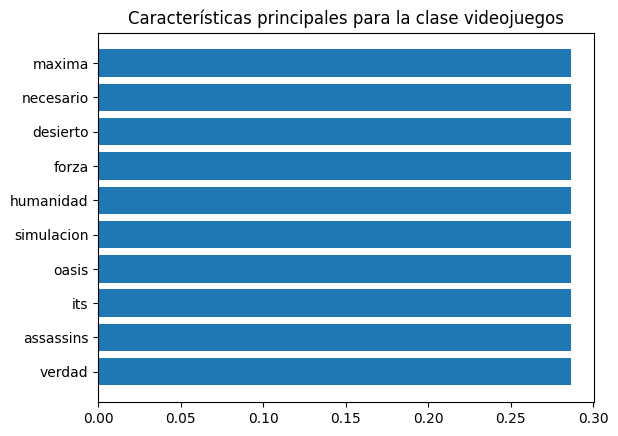

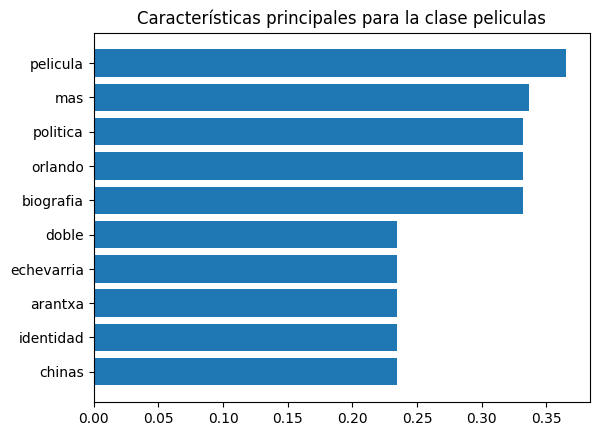

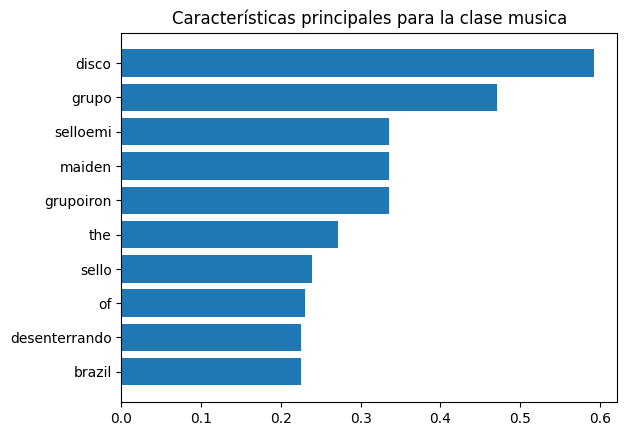

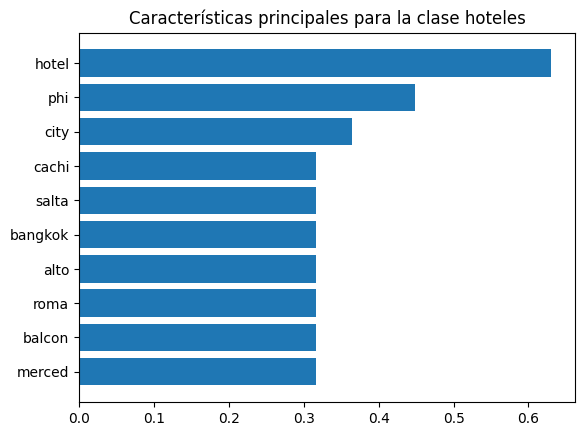

In [ ]:
import matplotlib.pyplot as plt

# Obt√©n los nombres de las caracter√≠sticas y los coeficientes
feature_names = vectorizer.get_feature_names_out()
coef = modelo_LR.coef_

# Visualiza los coeficientes m√°s importantes para cada clase
num_top_features = 10
for i, label in enumerate(labels_2.values()):
    top_features_idx = np.argsort(coef[i])[-num_top_features:]
    top_features_names = [feature_names[j] for j in top_features_idx]
    top_features_coef = coef[i][top_features_idx]

    plt.figure()
    plt.barh(top_features_names, top_features_coef)
    plt.title(f'Caracter√≠sticas principales para la clase {label}')
    plt.show()

Conclusiones:

Las metricas no dan para nada bien, pero es de esperar debido a la poca cantidad de datos que tenemos. En el grafico que muestra las palabras que mas influyen al modelo, en videojuegos se pueden ver palabras como maxima, necesario y desierto, que seguramente en un dataset de tama√±o considerable de titulos no aparecerian.

Lo mejor para obtener buenos resultados con tan pocos datos o hubiera sido no elegir todas criticas o aumentar bastante la cantidad de datos.

## **Ejercicio 3:**

Para cada categor√≠a, realizar las siguientes tareas:

‚óè Procesar el texto mediante recursos de normalizaci√≥n y limpieza.

‚óè Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las mismas mediante una nube de palabras.

Escribir un an√°lisis general del resultado obtenido.

In [7]:
# Leemos el csv
archivo = pd.read_csv('articulos.csv')

In [ ]:
#Librer√≠a para tratar los emojis
!pip install demoji
import demoji

# Descarga el conjunto de datos de emoji
demoji.download_codes()

#Librer√≠a para stopwords y frecuencias
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

# Descargar el conjunto de palabras de parada en espa√±ol
nltk.download('stopwords')
nltk.download('punkt')

# Definir las palabras de parada en espa√±ol
stop_words = set(stopwords.words('spanish'))

#Librer√≠a para lematizaci√≥n
!python -m spacy download es_core_news_sm
import es_core_news_sm

#Librer√≠a para nubes de palabras
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Para el uso de expresiones regulares
import re

In [9]:
# Crear un diccionario para almacenar los textos por categor√≠a
textos_por_categoria = {}

# Iterar a trav√©s de las categor√≠as y extraer los textos correspondientes
for categoria in archivo.categoria.unique():
    # Filtrar el DataFrame para la categor√≠a actual
    df_categoria_actual = archivo[archivo['categoria'] == categoria]

    # Extraer los textos de la categor√≠a actual y los almacena en una lista
    textos_categoria_actual = df_categoria_actual['texto'].tolist()

    # Almacena la lista de textos en el diccionario usando la categor√≠a como clave
    textos_por_categoria[categoria] = textos_categoria_actual

In [10]:
# Funci√≥n para eliminar stopwords de una frase
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
  return " ".join(filtered_text)

#Funci√≥n para procesar el texto
def procesar_texto(textos_por_categoria):
  #Se carga la funci√≥n para lematizar
  nlp = es_core_news_sm.load()

  # Creamos un objeto FreqDist para las palabras
  fdist_words = FreqDist()

  for texto in textos_por_categoria:
    #Elimino enlaces web
    texto = re.sub(r'http\S+|www\S+|\.com\b', '', texto)

    #Se quitan los emojis del texto
    sin_emojis = demoji.replace(texto,'')

    #Se quitan caracteres especiales
    sin_caracteres_especiales = re.sub(r'[^\w\s]+|\d+', '', sin_emojis)

    #Se lematiza para obtener la ra√≠z de cada palabra
    texto_lematizado = [token.lemma_.lower() for token in nlp(sin_caracteres_especiales)]
    texto_lematizado = ' '.join(texto_lematizado)

    #Se eliminan las stopwords
    sin_stop_words = remove_stopwords(texto_lematizado)

    # Eliminar menciones a "pictwitter"
    sin_stop_words = re.sub(r'pictwitter\S*', '', sin_stop_words)

    #Se cuenta la frecuencia de las palabras
    words = word_tokenize(sin_stop_words)

    # Actualizo FreqDist
    fdist_words.update(words)

  # Se guardan el total de palabras y las frecuencias
  total_palabras = f'Total de palabras: {len(fdist_words)}'
  frecuencia = dict(fdist_words)
  return total_palabras, dict(sorted(frecuencia.items())), sin_stop_words

#Funci√≥n para generear nubes de palabras
def generar_nube_palabras(categorias):
  n = 0
  plt.figure(figsize = (14,14), facecolor = None)
  for categoria in categorias:
    plt.subplot(141+n)
    wordcloud = WordCloud(width = 800, height = 800,
                            background_color ='white',
                            stopwords = None,
                            min_font_size = 10).generate(procesar_texto(textos_por_categoria[categoria])[2])
    plt.axis("off")
    plt.title(f'Categoria {categoria}',color='navy',fontweight='bold',fontsize=12, pad=15)
    plt.tight_layout(pad = 1.5)
    plt.imshow(wordcloud)
    n += 1
  plt.show()

### **Nube de palabras**

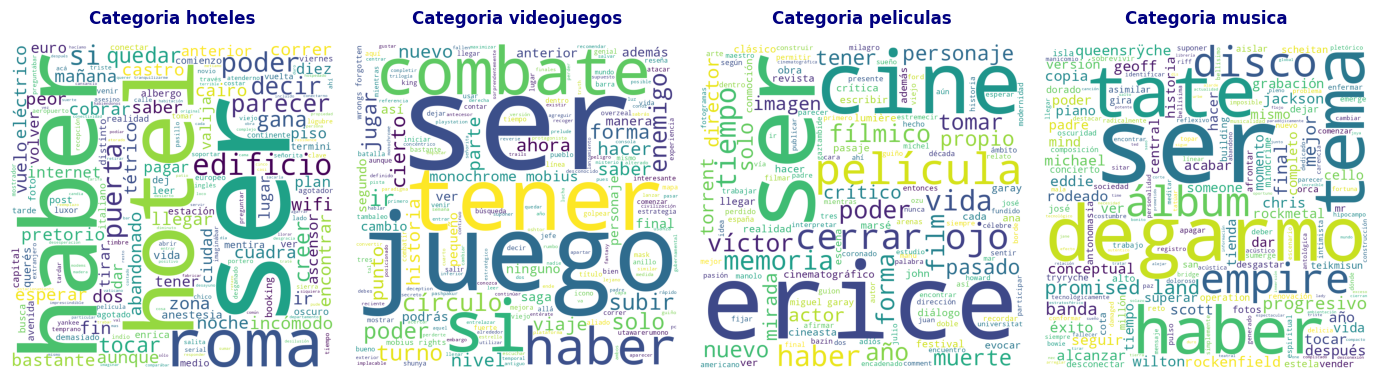

In [11]:
generar_nube_palabras(['hoteles','videojuegos','peliculas','musica'])

### **Resultado: frecuencia de palabras**

In [12]:
procesar_texto(textos_por_categoria['peliculas'])[:2]

('Total de palabras: 2128',
 {'abandonado': 1,
  'abandonar': 2,
  'abonado': 1,
  'abordar': 1,
  'abrazar': 1,
  'abrir': 2,
  'absolutamente': 2,
  'absurdo': 1,
  'abuela': 1,
  'abuelo': 1,
  'abusar': 1,
  'acabar': 5,
  'academia': 1,
  'accec': 2,
  'accesible': 1,
  'accidente': 1,
  'acelerado': 1,
  'acepci√≥n': 2,
  'aceptaci√≥n': 1,
  'aceptado': 1,
  'aceptar': 3,
  'acercamiento': 1,
  'acercar': 1,
  'acogida': 1,
  'acompa√±ar': 1,
  'actitud': 1,
  'actividad': 1,
  'acto': 2,
  'actor': 5,
  'actriz': 3,
  'actual': 3,
  'actualidad': 2,
  'acudir': 3,
  'acuerdo': 1,
  'adaptaci√≥n': 2,
  'adaptar': 1,
  'adelantar': 1,
  'adelante': 1,
  'adem√°s': 9,
  'adentran': 1,
  'adentrar': 3,
  'adicto': 2,
  'adi√≥s': 2,
  'adolescencia': 2,
  'adolescente': 2,
  'adoptado': 1,
  'adoptar': 1,
  'adoptivo': 1,
  'adoro': 2,
  'adusta': 1,
  'ad√®le': 1,
  'afich': 2,
  'afincar': 1,
  'afirmaci√≥n': 1,
  'afirmar': 2,
  'afrontar': 1,
  'agotar': 1,
  'agradecer': 1,
  'a

In [13]:
procesar_texto(textos_por_categoria['hoteles'])[:2]

('Total de palabras: 1261',
 {'abandonado': 2,
  'abierto': 1,
  'abonar': 1,
  'abril': 1,
  'abrir': 2,
  'abstener': 1,
  'acceder': 1,
  'accesibl': 1,
  'aceptable': 2,
  'aceptar': 3,
  'aclarar': 1,
  'acogedor': 1,
  'acondicionado': 6,
  'aconsejable': 1,
  'acostumbrar': 1,
  'acotado': 1,
  'actualizada': 1,
  'actualizado': 1,
  'ac√°': 4,
  'adem√°s': 4,
  'ad√≥nde': 1,
  'aerol√≠nea': 1,
  'aeropuerto': 3,
  'afortunadamente': 1,
  'afuera': 2,
  'agarrar': 1,
  'agobiarte': 1,
  'agotado': 1,
  'agotador': 1,
  'agradable': 2,
  'agradecer': 1,
  'agradezco': 1,
  'agua': 2,
  'ah': 1,
  'ahora': 3,
  'ah√≠': 5,
  'aire': 7,
  'albergo': 1,
  'albergue': 2,
  'alejado': 1,
  'alejandr√≠a': 1,
  'alejar': 1,
  'alguno': 6,
  'almohado': 1,
  'alogir': 2,
  'alojamiento': 6,
  'alojar': 1,
  'alquil': 1,
  'alrededor': 2,
  'alto': 5,
  'amable': 3,
  'amamos': 1,
  'amanecer': 2,
  'amante': 1,
  'ambiente': 1,
  'ambos': 2,
  'ameniti': 2,
  'american': 1,
  'amor': 1,
 

In [14]:
procesar_texto(textos_por_categoria['musica'])[:2]

('Total de palabras: 2267',
 {'abandonar': 1,
  'abandono': 1,
  'abierto': 1,
  'abrazo': 1,
  'abrir': 3,
  'absoluto': 1,
  'absurdo': 1,
  'abuela': 1,
  'abusar': 1,
  'acabar': 7,
  'acabario': 1,
  'acabar√≠a': 1,
  'acabasar': 1,
  'acad√©mico': 1,
  'acampada': 1,
  'acceso': 3,
  'acelerado': 1,
  'acelerar': 1,
  'aceptar': 1,
  'achacar': 2,
  'acompasado': 1,
  'acompa√±ado': 2,
  'acompa√±ar': 2,
  'acord': 1,
  'acordar': 1,
  'acorde': 1,
  'acostumbrar': 1,
  'action': 1,
  'actitud': 1,
  'acto': 5,
  'actuaci√≥n': 1,
  'actual': 1,
  'actualidad': 2,
  'acud√≠': 1,
  'acuerdo': 1,
  'ac√©rrimo': 2,
  'ac√∫stica': 1,
  'ac√∫stico': 1,
  'adelantado': 1,
  'adelante': 3,
  'adelanto': 1,
  'adem√°s': 3,
  'adicci√≥n': 1,
  'adi√≥s': 1,
  'adolescente': 1,
  'adorar': 1,
  'adornar': 1,
  'adquisici√≥n': 1,
  'adrenalina': 2,
  'adrian': 3,
  'aegis': 1,
  'afectar': 1,
  'afrontar': 1,
  'after': 1,
  'agitado': 1,
  'agotado': 1,
  'agotamiento': 1,
  'agrado': 1,
  '

In [15]:
procesar_texto(textos_por_categoria['videojuegos'])[:2]

('Total de palabras: 2197',
 {'abajo': 7,
  'abas√≠': 1,
  'abierto': 1,
  'abolladura': 1,
  'abordar': 1,
  'abr': 1,
  'abrazar': 1,
  'abrebocas': 1,
  'abrir': 2,
  'abr√≥chate': 1,
  'abuelo': 3,
  'acabar': 2,
  'acariciaste': 1,
  'acceder': 3,
  'acceso': 2,
  'accidente': 5,
  'acci√≥n': 9,
  'acecho': 1,
  'aceleraci√≥n': 1,
  'aceptar': 1,
  'acercar': 3,
  'acercarte': 1,
  'acierto': 2,
  'acompa√±ante': 1,
  'acompa√±ar': 1,
  'acomp√°√±ame': 2,
  'acontecimiento': 1,
  'acostumbrado': 1,
  'acrobacia': 1,
  'action': 2,
  'actitud': 1,
  'activar': 2,
  'actividad': 1,
  'activo': 1,
  'actor': 2,
  'actual': 1,
  'actualizaci√≥n': 2,
  'actualizar': 1,
  'actualmente': 2,
  'actuar': 2,
  'acuerdo': 1,
  'ac√°': 1,
  'ada': 6,
  'adaptaci√≥n': 3,
  'adecuado': 1,
  'adelantarte': 1,
  'adelante': 2,
  'adelanter': 1,
  'adem√°s': 10,
  'adicional': 2,
  'adici√≥n': 1,
  'administr': 1,
  'adquirir': 1,
  'aerodin√°mico': 1,
  'afectar': 2,
  'aferr√°ndonos': 1,
  'afte

### **Conlusi√≥n:**
**Luego de procesar los datos eliminando texto innecesario, caracteres especiales, emojis, etc, se obtuvo el texto que nos interesa.**
**A trav√©s de la nube de palabras generada por la funci√≥n de ploteo, se pueden visualizar aquellas palabras mas representativas y con m√°s frecuencia en base a su tama√±o en el gr√°fico.**
**Llamando a la funci√≥n que nos procesa el texto obtenemos el total de palabras y la frecuencia para cada una de ellas luego de aplicar las transformaciones. Como es de esperar ciertas palabras relacionadas a la categoria que pertenecen tienen una mayor frecuencia.**
**Es necesario comentar que la representatividad de ciertas palabras no se vuelve tan evidente en un conjunto tan peque√±o de datos.**

## **Ejercicio 4:**

**Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los t√≠tulos de las noticias de una de las categor√≠as.**
**Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposici√≥n a los resultados que hubiera esperado obtener.**


### Dependencias y librerias

In [ ]:
# Primero preparamos el entorno en Colab
%%capture

# Todos los modelos
!pip install unidecode
from unidecode import unidecode
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Primer modelo: Promedio de Word Embeddings
!pip install spacy
!python -m spacy download en_core_web_md
import en_core_web_md

# Segundo modelo: Universal Sentence Encoder
!pip install "tensorflow-text"
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-text
!pip install bokeh==2.4.3
!pip install simpleneighbors[annoy]
!pip install tqdm

import tensorflow_text
import bokeh
import bokeh.models
import bokeh.plotting
import os
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
import sklearn

# Tercer modelo: Doc2Vec
!pip install gensim

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Cuarto modelo: S-BERT
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Implementaci√≥n

#### Variables inciciales

In [ ]:
# Separamos los t√≠tulos de una categor√≠a que eligamos
chosen_category = 'videojuegos'
data_ej4 = dataset[dataset['categoria'] == chosen_category]
titles = data_ej4['titulo']  # Solo almacenamos los t√≠tulos de dicha categor√≠a

titles_list = []
for title in titles:
    title = re.sub(r'[!,¬ø¬°‚Äô?]', '', title.lower()) # Eliminamos signos de exclamaci√≥n, integorraci√≥n, etc. y convertimos a min√∫scula
    title = unidecode(title) # Eliminamos las t√≠ldes
    titles_list.append(title)  # Guardamos dentro de una lista los titulos para facilitar el manejo de los mismos

#### Primer modelo: **Promedio de Word Embeddings**

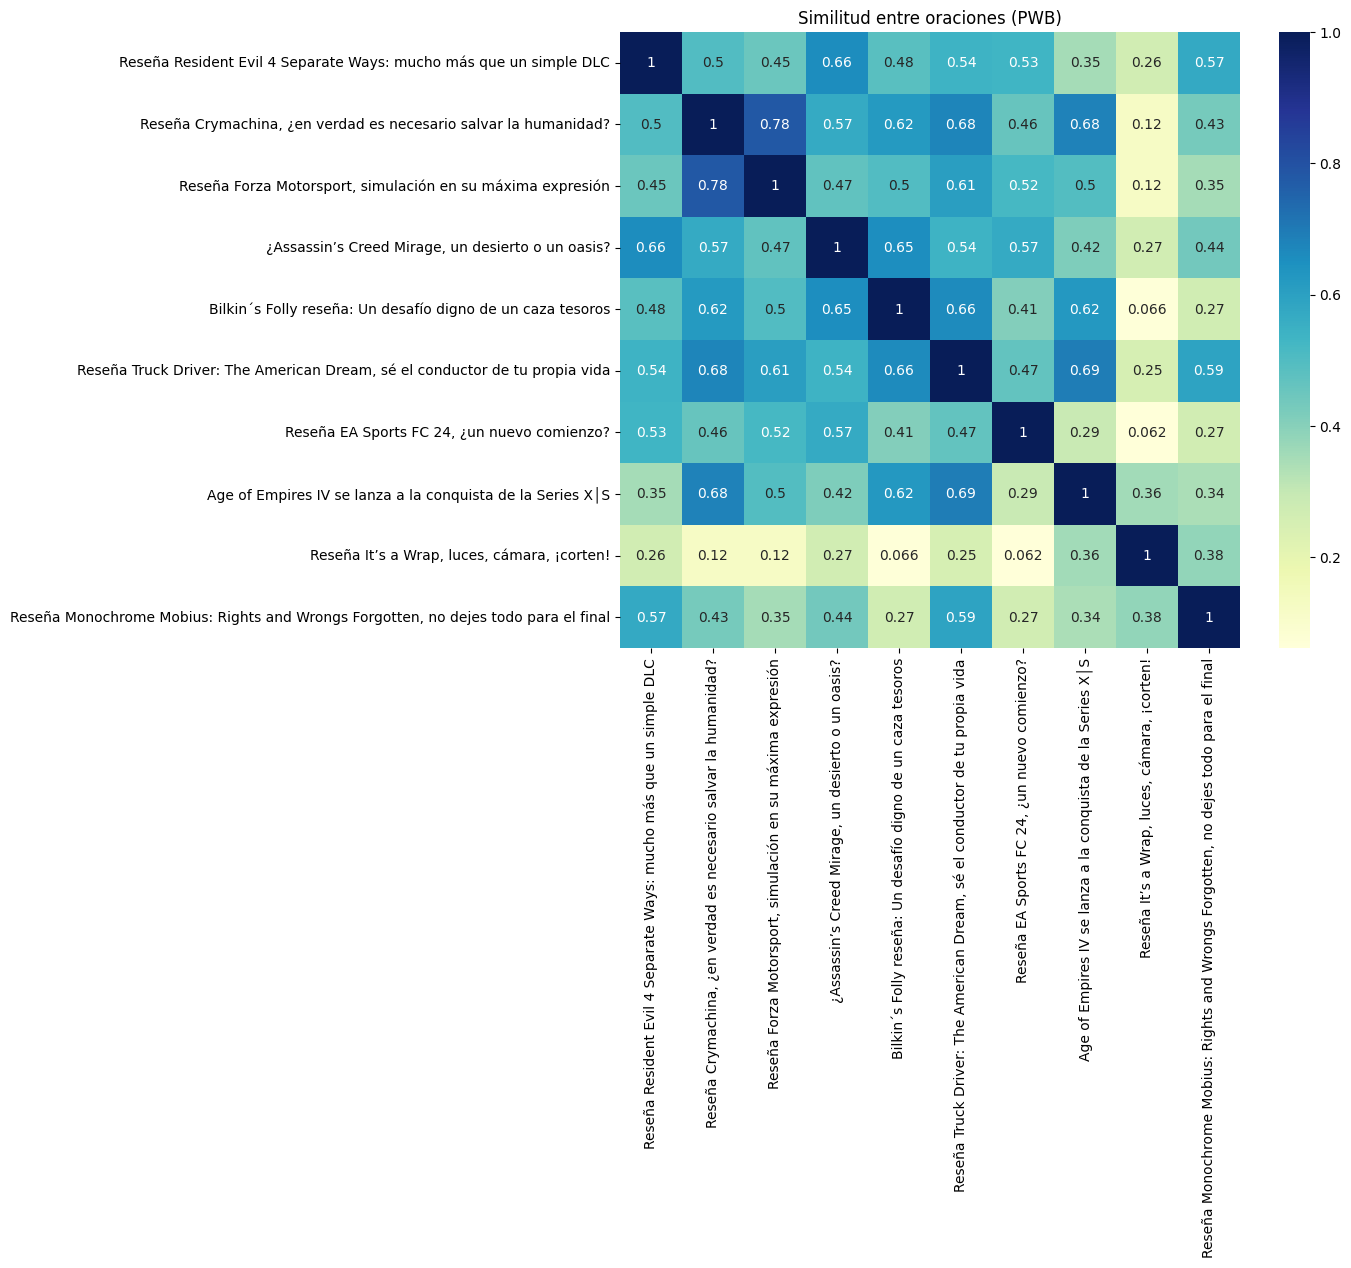

In [ ]:
nlp = en_core_web_md.load()
similarities = []
for i in titles_list:
    row = []
    for x in titles_list:
        sim = nlp(i).similarity(nlp(x))
        row.append(sim)
    similarities.append(row)

# Creamos un mapa de calor de la matriz de similitud
plt.figure(figsize=(10, 8))
sns.heatmap(similarities, annot=True, xticklabels=titles, yticklabels=titles, cmap="YlGnBu")
plt.title("Similitud entre oraciones (PWB)")
plt.show()

#### Segundo modelo: **Universal Sentence Encoder (USE)**

In [ ]:
def visualize_similarity(embeddings_1, embeddings_2, labels_1, labels_2,
                         plot_title,
                         plot_width=1200, plot_height=600,
                         xaxis_font_size='12pt', yaxis_font_size='12pt'):

  assert len(embeddings_1) == len(labels_1)
  assert len(embeddings_2) == len(labels_2)

  # arccos based text similarity (Yang et al. 2019; Cer et al. 2019)
  sim = 1 - np.arccos(
      sklearn.metrics.pairwise.cosine_similarity(embeddings_1,
                                                 embeddings_2))/np.pi

  embeddings_1_col, embeddings_2_col, sim_col = [], [], []
  for i in range(len(embeddings_1)):
    for j in range(len(embeddings_2)):
      embeddings_1_col.append(labels_1[i])
      embeddings_2_col.append(labels_2[j])
      sim_col.append(sim[i][j])
  df = pd.DataFrame(zip(embeddings_1_col, embeddings_2_col, sim_col),
                    columns=['embeddings_1', 'embeddings_2', 'sim'])

  mapper = bokeh.models.LinearColorMapper(
      palette=[*reversed(bokeh.palettes.YlOrRd[9])], low=df.sim.min(),
      high=df.sim.max())

  p = bokeh.plotting.figure(title=plot_title, x_range=labels_1,
                            x_axis_location="above",
                            y_range=[*reversed(labels_2)],
                            width=plot_width, height=plot_height,
                            tools="save",toolbar_location='below', tooltips=[
                                ('pair', '@embeddings_1 ||| @embeddings_2'),
                                ('sim', '@sim')])
  p.rect(x="embeddings_1", y="embeddings_2", width=1, height=1, source=df,
         fill_color={'field': 'sim', 'transform': mapper}, line_color=None)

  p.title.text_font_size = '12pt'
  p.axis.axis_line_color = None
  p.axis.major_tick_line_color = None
  p.axis.major_label_standoff = 16
  p.xaxis.major_label_text_font_size = xaxis_font_size
  p.xaxis.major_label_orientation = 0.25 * np.pi
  p.yaxis.major_label_text_font_size = yaxis_font_size
  p.min_border_right = 300

  bokeh.io.output_notebook()
  bokeh.io.show(p)

# El modelo que usaremos es uno multiling√ºe (de 16 idiomas)
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'
model = hub.load(module_url)

def embed_text(input):
  return model(input)
embed_titles = embed_text(titles_list)

visualize_similarity(embed_titles, embed_titles, titles_list, titles_list, 'Similitud entre t√≠tulos (USE)')

<ipython-input-41-fdeac635cb17>:10: RuntimeWarning: invalid value encountered in arccos
  sim = 1 - np.arccos(


#### Tercer modelo: **Doc2Vec**

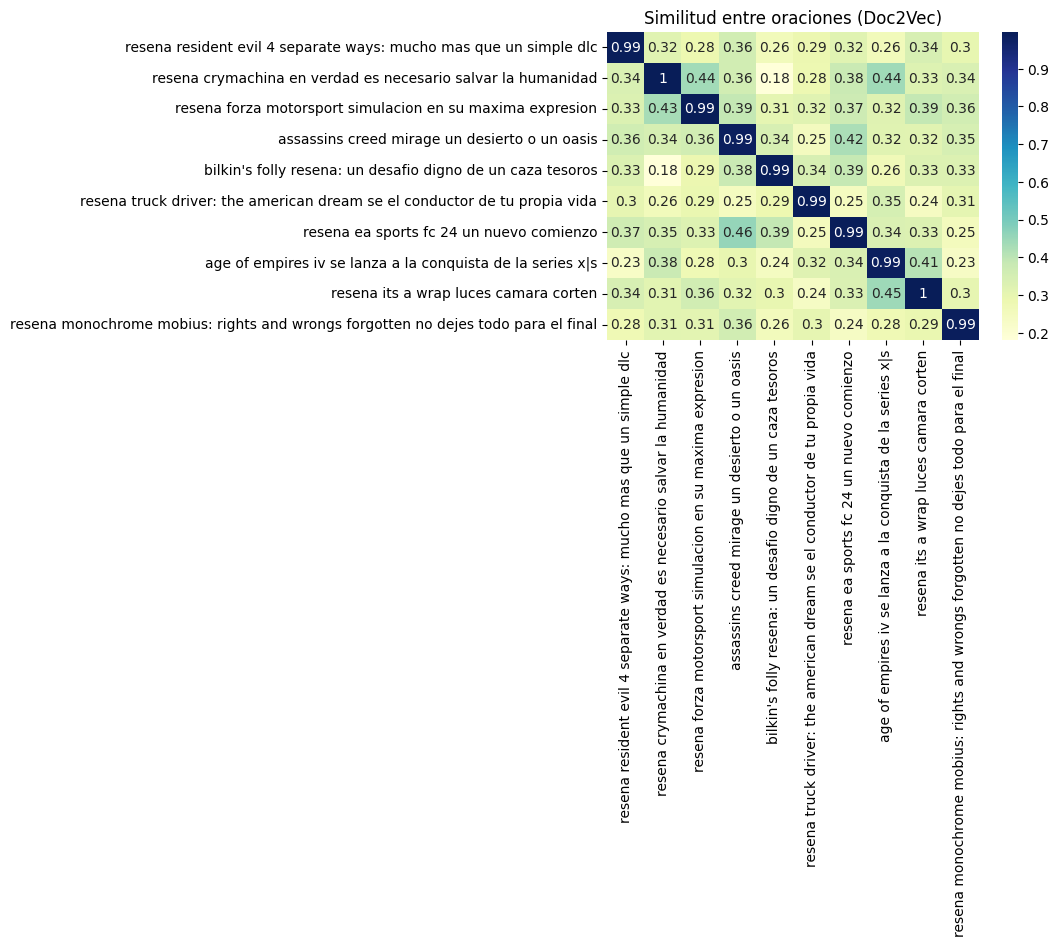

In [ ]:
# Tokenizamos los datos y los etiquetamos
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(titles_list)]

# Configuramos los par√°metros para el modelo
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=1000)

# Contruimos el vocabulario
model.build_vocab(tagged_data)

# Entrenamos el modelo
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

similarities_d2v = []
for i in titles_list:
    vector = model.infer_vector(word_tokenize(str(i).lower()))

    similares = model.dv.most_similar(vector) # Vemos las similitudes de cada t√≠tulo con todos los dem√°s
    similarities_d2v.append(similares) # Los guardamos en una lista

# Ordenamos cada sublista seg√∫n el √≠ndice de cada tupla
sorted_similarities = [sorted(sublist, key=lambda x: int(x[0])) for sublist in similarities_d2v]

# Luego separamos de cada tupla el segundo elemento de cada sublista, este representa la similitud de cada t√≠tulo con los dem√°s
heatmap_similarities = [[tup[1] for tup in sublista] for sublista in sorted_similarities]

# Creamos un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_similarities, annot=True, xticklabels=titles_list, yticklabels=titles_list, cmap="YlGnBu")
plt.title("Similitud entre oraciones (Doc2Vec)")
plt.show()

#### Cuarto modelo: **Sentence-BERT (S-BERT)**

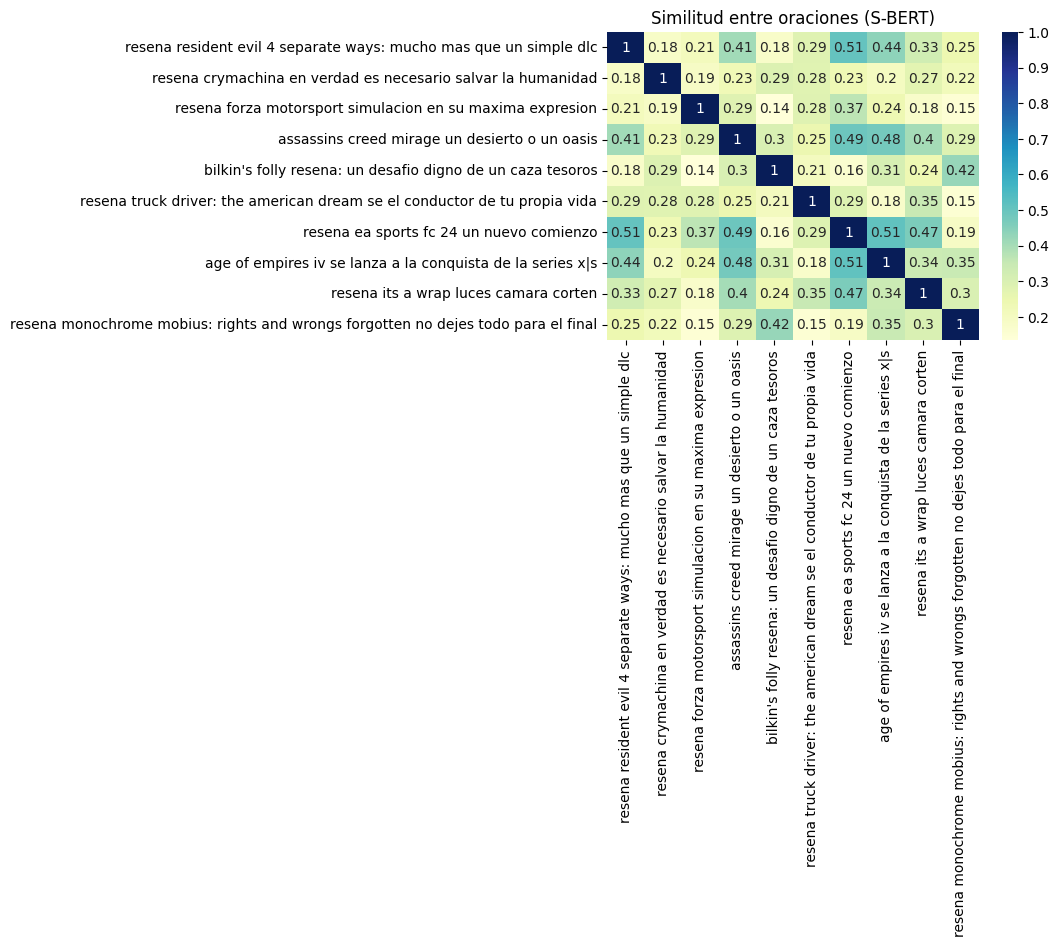

In [ ]:
# Cargamos el modelo preentrenado all-mpnet-base-v2
modelo = SentenceTransformer('all-mpnet-base-v2')

# Codificamos las oraciones
embeddings = modelo.encode(titles_list, convert_to_tensor=True)

# Calculamos las puntuaciones de similitud
cosine_scores = util.cos_sim(embeddings, embeddings)

# Creamos un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cosine_scores, annot=True, xticklabels=titles_list, yticklabels=titles_list, cmap="YlGnBu")
plt.title("Similitud entre oraciones (S-BERT)")
plt.show()

#### Reflexiones sobre los modelos

Cada modelo emplea diversas t√©cnicas para analizar la sem√°ntica de cada t√≠tulo y determinar si son similares o no. Estos modelos var√≠an desde el enfoque m√°s b√°sico hasta el m√°s sofisticado, y, en consecuencia, producen resultados diferentes. Sin embargo, al examinar todos los t√≠tulos en la categor√≠a de videojuegos, notamos que hay numerosos t√≠tulos que siguen la estructura de 'Rese√±as a...'. En otras palabras, muchos t√≠tulos comparten un tema com√∫n: la rese√±a de un videojuego, algunos con comentarios adicionales en el t√≠tulo y otros sin estos.

Para nosotros, es evidente que estos t√≠tulos son muy similares, ya que todos se centran en la misma tem√°tica y tratan sobre el acto de rese√±ar un videojuego. Sin embargo, los modelos no logran captar esta similitud, ya que carecen de la capacidad de comprender el contexto detr√°s en cada t√≠tulo sin acceder al contenido de la noticia, a diferencia de nosotros.

### **Ejercicio 5:**

**Escriba un programa interactivo que, seg√∫n la categor√≠a seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella.**
**Justifique la elecci√≥n del modelo usado para tal fin.**


**Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los t√≠tulos de las noticias de una de las categor√≠as.**
**Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposici√≥n a los resultados que hubiera esperado obtener.**


In [ ]:
!pip install spacy
!python -m spacy download es_core_news_md

In [17]:
import spacy
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import textwrap
from IPython.display import HTML

In [18]:
# Funci√≥n para generar un resumen extractivo usando PageRank
def summarize(similarity_matrix, original_sentences, num_sentences=5):
    # Crear un grafo a partir de la matriz de similitud
    nx_graph = nx.from_numpy_array(similarity_matrix)
    # Aplicar PageRank al grafo
    scores = nx.pagerank(nx_graph,alpha=0.1) #MODIFIQUE EL ALFA PORQUE NO CONVERG√çA
    # Ordenar las oraciones por su puntuaci√≥n y seleccionar las mejores
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(original_sentences)), reverse=True)
    return ' '.join([ranked_sentences[i][1] for i in range(num_sentences)])

def resumir(categoria):
  nlp = spacy.load('es_core_news_md')
  texto_por_categoria = archivo[archivo['categoria'] == categoria]
  texto_por_categoria.reset_index(inplace=True)

  # Lematizar y eliminar stopwords de cada oraci√≥n
  resumen_global = {}
  nro_noticia = 0
  for texto in texto_por_categoria.texto:
    lemmatized_sentences = []
    original_sentences = []
    doc = nlp(texto)
    for sent in doc.sents:
        lemmatized_sentence = " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
        if lemmatized_sentence.strip() != '':  # Asegurarse de que la oraci√≥n no est√© vac√≠a
            lemmatized_sentences.append(lemmatized_sentence)
            original_sentences.append(str(sent).strip())

    # Procesar las oraciones lematizadas con spaCy para obtener sus vectores
    lemmatized_docs = [nlp(sent) for sent in lemmatized_sentences]

    # Obtenemos una lista con los vectores de cada oraci√≥n
    sentence_vectors = [sent.vector for sent in lemmatized_docs]

    # Crear una matriz de similitud entre las oraciones filtradas
    similarity_matrix = cosine_similarity(sentence_vectors)
    resumen = summarize(similarity_matrix, original_sentences, num_sentences=2)
    resumen_global[texto_por_categoria.titulo[nro_noticia]]=resumen
    nro_noticia += 1

  for key, values in resumen_global.items():
    html_text = f'<div style="width:100%">{values}</div>'
    print(f'{key}:')
    display(HTML(html_text))
    print()

In [19]:
def dar_resumen():
  while True:
    categoria = int(input('Ingrese el n√∫mero la categoria seleccionada: \n1-Pel√≠culas \n2-Musica \n3-Hoteles \n4-Videojuegos \n5-Para salir\n\n'))
    if categoria == 1:
      print('---------------Resumen de la categor√≠a pel√≠culas---------------')
      resumir('peliculas')
      print('---------------------------------------------------------------')
    elif categoria == 2:
      print('---------------Resumen de la categor√≠a musica---------------')
      resumir('musica')
      print('---------------------------------------------------------------')
    elif categoria == 3:
      print('---------------Resumen de la categor√≠a hoteles---------------')
      resumir('hoteles')
      print('---------------------------------------------------------------')
    elif categoria == 4:
      print('---------------Resumne de la categor√≠a videojuegos--------------')
      resumir('videojuegos')
      print('---------------------------------------------------------------')
    else:
      print('----------------------------------')
      print('Finalizando el resumen de noticias')
      print('----------------------------------')
      print()
      break

### **Programa interactivo para generar resumenes**

In [20]:
dar_resumen()

Ingrese el n√∫mero la categoria seleccionada: 
1-Pel√≠culas 
2-Musica 
3-Hoteles 
4-Videojuegos 
5-Para salir

1
---------------Resumen de la categor√≠a pel√≠culas---------------
Cr√≠tica de ‚ÄòMi otro Jon‚Äô, comedia solidaria con Carmen Maura y Aitana S√°nchez-Gij√≥n:



Cr√≠tica de 'Killers of the Flower Moon': un monumental Scorsese da a Leonardo DiCaprio el papel de su vida:



Cr√≠tica de ‚ÄòEl reino animal‚Äô, un relato de fantas√≠a sobre la adolescencia, la diversidad y las bestias humanas:



Cr√≠tica de ‚ÄòMe he hecho viral‚Äô, cuando el m√≥vil te la juega:



Cr√≠tica de ‚ÄòAl otro lado del r√≠o y entre los √°rboles‚Äô, Hemingway visto por Paula Ortiz:



Cr√≠tica de ‚ÄòOrlando, mi biograf√≠a pol√≠tica‚Äô:



Cr√≠tica de 'El exorcista: Creyente', a favor y en contra de la secuela de la pel√≠cula m√°s terror√≠fica de la historia:



Cr√≠tica de 'Chinas': Doble identidad de la mano de Arantxa Echevarr√≠a:



Cr√≠tica de ‚ÄòSaw X‚Äô, una nueva y macabra pel√≠cula de la saga de terror m√°s salvaje:



Cr√≠tica de 'Cerrar los ojos', nueva obra maestra de V√≠ctor Erice para el cine espa√±ol:



---------------------------------------------------------------
Ingrese el n√∫mero la categoria seleccionada: 
1-Pel√≠culas 
2-Musica 
3-Hoteles 
4-Videojuegos 
5-Para salir

2
---------------Resumen de la categor√≠a musica---------------
Grupo: THEATRE OF TRAGEDY. Disco:Last curtain call.¬†A√±o:2011:



Grupo: MERCURIO.  Disco: Re-genesis. Sello:The fish factory.¬†A√±o:2018.:



Grupo:IRON MAIDEN. Disco:Somewhere in time. A√±o:1987.¬†Sello:EMI:



Grupo:BRING ME THE HORIZON. Disco:Sempiternal. Sello:RCA Records A√±o:2013.¬†Nota:9‚Äô5:



Grupo: CULTES DES GHOULES Disco: Henbane, ‚Ä¶or Sonic Compendium of the Black Arts (2013) Sello: Under the Sign of Garazel¬†Productions:



40 a√±os del inicio de un g√©nero. El Kill‚Äôem all de¬†METALLICA.:



Grupo: JUDAS PRIEST. Disco: Stained class. A√±o:¬†1978.:



Grupo:IRON MAIDEN. Disco: A matter of life and death. Sello:EMI.¬†A√ëO:2006.:



REA-194 Desenterrando tesoros: VIPER Brazil ¬´Evolution¬ª y su¬†vida.:



Grupo: QUEENSR≈∏CHE               Disco: Promised Land                 Sello: EMI                                    Fecha de publicaci√≥n: 18 de octubre de¬†1994:



---------------------------------------------------------------
Ingrese el n√∫mero la categoria seleccionada: 
1-Pel√≠culas 
2-Musica 
3-Hoteles 
4-Videojuegos 
5-Para salir

3
---------------Resumen de la categor√≠a hoteles---------------
Rese√±a: La Merced del Alto (Cachi):



Rese√±a: Hotel Apraxin (San Petersburgo):



Rese√±a: Gia Vien Hotel (Ho Chi Minh City):



Rese√±a de Havana Hotel (El Cairo):



Rese√±a: Balc√≥n de la Plaza (Salta):



Rese√±a: Tara Place (Bangkok):



Rese√±a: JJ Bungalows (Phi Phi):



Rese√±a: Travelodge Fort Myers:



Rese√±a: Comfort Inn Long Island City (Nueva York):



Rese√±a: Albergo Enrica (Roma):



---------------------------------------------------------------
Ingrese el n√∫mero la categoria seleccionada: 
1-Pel√≠culas 
2-Musica 
3-Hoteles 
4-Videojuegos 
5-Para salir

4
---------------Resumne de la categor√≠a videojuegos--------------
Rese√±a Resident Evil 4 Separate Ways: mucho m√°s que un simple DLC:



Rese√±a Crymachina, ¬øen verdad es necesario salvar la humanidad?:



Rese√±a Forza Motorsport, simulaci√≥n en su m√°xima expresi√≥n:



¬øAssassin‚Äôs Creed Mirage, un desierto o un oasis?:



Bilkin¬¥s Folly rese√±a: Un desaf√≠o digno de un caza tesoros:



Rese√±a Truck Driver: The American Dream, s√© el conductor de tu propia vida:



Rese√±a EA Sports FC 24, ¬øun nuevo comienzo?:



Age of Empires IV se lanza a la conquista de la Series X‚îÇS:



Rese√±a It‚Äôs a Wrap, luces, c√°mara, ¬°corten!:



Rese√±a Monochrome Mobius: Rights and Wrongs Forgotten, no dejes todo para el final:



---------------------------------------------------------------
Ingrese el n√∫mero la categoria seleccionada: 
1-Pel√≠culas 
2-Musica 
3-Hoteles 
4-Videojuegos 
5-Para salir

5
----------------------------------
Finalizando el resumen de noticias
----------------------------------



**Se elige usar resumen extractivos con la idea de mantener el sentido original de las rese√±as y no perderse de una cr√≠tica paraticular con el uso de las transformaciones que generan los resumenes abstractivos.**

## **Opcional:**
**Investigar y programar un bot de Telegram que entregue un resumen de noticias del blog de su elecci√≥n. Recomendamos el uso de pyTelegramBotAPI**